#### A 2 node experiment to demonstrate the network simulation with random attack and defend process in cyborg

In [1]:
import random
from os.path import dirname
from pprint import pprint
import inspect
from CybORG import CybORG
from CybORG.Simulator.Scenarios import FileReaderScenarioGenerator
from CybORG.Simulator.Actions import *
from CybORG.Agents import RandomAgent
import numpy as np
import time

path = str(inspect.getfile(CybORG))
#path= dirname(path) + f'/Simulator/Scenarios/scenario_files/Scenario_3nodes.yaml'
path = f'C:/Users/HPP/Desktop/cyborg/vu_cyborg/CybORG/CybORG/Simulator/Scenarios/scenario_files/Scenario_rg1.yaml'
sg = FileReaderScenarioGenerator(path)
print('Scenario file path is:',path)

env = CybORG(scenario_generator=sg)
#pprint(dir(env))

#pprint('IP map of network is:',env.get_ip_map())
#pprint('Red agent state is:',env.get_agent_state('Red'))
#pprint('Red agent action space is:',env.get_action_space('Red'))
print('==> IP map of network is:')
pprint(env.get_ip_map())



ips= env.get_ip_map()
userip= ips['User0']
print('-> user ip to attack is:',userip)

Scenario file path is: C:/Users/HPP/Desktop/cyborg/vu_cyborg/CybORG/CybORG/Simulator/Scenarios/scenario_files/Scenario_rg1.yaml
==> IP map of network is:
{'Defender': IPv4Address('10.0.167.133'),
 'User0': IPv4Address('10.0.167.141'),
 'User_router': IPv4Address('10.0.167.135')}
-> user ip to attack is: 10.0.167.141


C:\Users\HPP\miniconda3\envs\cyborg\lib\site-packages\gym\utils\seeding.py:48: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "


In [3]:
red_actions=['Sleep','DiscoverNetworkServices','ExploitRemoteService']
blue_actions=['Sleep','Analyse','Remove']
states=['blue','green','orange','red']
host_state='blue'
log=[] #log [init_state,red_Action,state,blue_action,state,....] 
log.append(host_state)

In [5]:
steps=10
random_actions=np.random.randint(3,size=steps*2)

print('Ranom actions are:',random_actions)
for i in range(0,len(random_actions),2):
    #first red random action
    red_action_id=random_actions[i]
    red_action=red_actions[red_action_id]
    print('Red agent action is:',red_action)
    log.append(red_action)
    if red_action=='DiscoverNetworkServices':
       action = DiscoverNetworkServices(session=0,agent='Red',ip_address=userip)
       if host_state=='blue' or 'green':
            host_state='orange'
       else:
            pass
    elif red_action=='Sleep':
       action=Sleep()
    elif red_action=='ExploitRemoteService':
       action=ExploitRemoteService(ip_address=userip,session=0,agent='Red')
       if host_state=='orange':
            host_state='red'
       else:
            pass
    results = env.step(action=action, agent='Red')
    print('==> Red agent state after attack:')
    pprint(results.observation)
    log.append(host_state)
    #todo: log state of node here
    #print('==> Red agent state:')
    #pprint(env.get_agent_state('Red'))
    
    #second blue random action
    blue_action_id=random_actions[i+1]
    blue_action= blue_actions[blue_action_id]
    print('Blue agent action is:',blue_action)
    log.append(blue_action)  
    print('Host state is:',host_state)
    if blue_action=='Analyse':
       action = Analyse(hostname='User0', session=0, agent='Blue')
       if host_state=='red' or 'orange':
            host_state='green'      
    elif blue_action=='Sleep':
       action=Sleep()
    elif blue_action=='Remove':
       action = Remove(hostname='User0', session=0, agent='Blue')
       if host_state=='red' or 'orange':
            host_state='blue' 
    results = env.step(action=action, agent='Blue')
    print('==> Blue agent state after attack:')
    pprint(results.observation)
    log.append(host_state)

print('log is:',log)    

Ranom actions are: [2 2 1 0 2 1 2 1 0 0 2 0 0 2 0 1 2 0 1 1]
Red agent action is: ExploitRemoteService
==> Red agent state after attack:
{'success': <TrinaryEnum.FALSE: 3>}
Blue agent action is: Remove
Host state is: blue
==> Blue agent state after attack:
{'success': <TrinaryEnum.TRUE: 1>}
Red agent action is: DiscoverNetworkServices
==> Red agent state after attack:
{'10.0.167.141': {'Interface': [{'IP Address': IPv4Address('10.0.167.141')}],
                  'Processes': [{'Connections': [{'local_address': IPv4Address('10.0.167.141'),
                                                  'local_port': 22}]},
                                {'Connections': [{'local_address': IPv4Address('10.0.167.141'),
                                                  'local_port': 21}]}]},
 'success': <TrinaryEnum.TRUE: 1>}
Blue agent action is: Sleep
Host state is: orange
==> Blue agent state after attack:
{'success': <TrinaryEnum.UNKNOWN: 2>}
Red agent action is: ExploitRemoteService
==> Red agent s

##### Observed state from the perspective of red agent

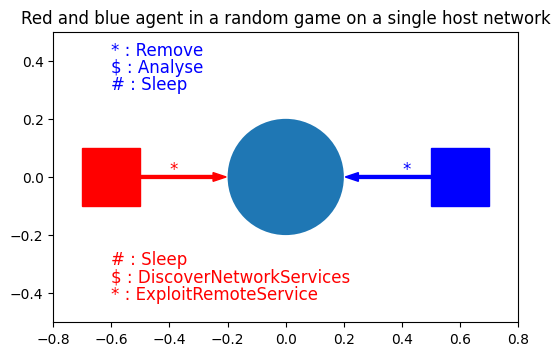

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

figure, axes = plt.subplots(figsize=(6,8))
red_agent = plt.Rectangle((-0.7,-0.1), 0.20, 0.20, fc='red',ec="red") 
blue_agent = plt.Rectangle((0.5,-0.1), 0.20, 0.20, fc='blue',ec="blue") 
plt.gca().add_patch(red_agent)
axes.add_artist( blue_agent )
plt.title( 'Red and blue agent in a random game on a single host network' )
plt.text(-0.6, -0.3, '# : Sleep', fontsize = 12,color='red')
plt.text(-0.6, -0.36, '$ : DiscoverNetworkServices', fontsize = 12,color='red')
plt.text(-0.6, -0.42, '* : ExploitRemoteService ', fontsize = 12,color='red')

plt.text(-0.6, 0.3, '# : Sleep', fontsize = 12,color='blue')
plt.text(-0.6, 0.36, '$ : Analyse', fontsize = 12,color='blue')
plt.text(-0.6, 0.42, '* : Remove', fontsize = 12,color='blue')


plt.text(-0.4, 0.01, '*', fontsize = 12,color='red')
plt.text(0.4, 0.01, '*', fontsize = 12,color='blue')
plt.arrow(-0.5,0.0,0.25,0,width=0.01, color='red')
plt.arrow(0.5,0.0,-0.25,0,width=0.01, color='blue')
Drawing_colored_circle = plt.Circle(( 0.0 , 0.0 ), 0.2 )

axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )

plt.xlim([-0.8, 0.8])
plt.ylim([-0.5, 0.5])
plt.show()